In [1]:
db_file = 'ted-talks/ted-talks.db'

In [2]:
import sqlite3
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [3]:
with sqlite3.connect(db_file) as db:  
    vocab = pd.read_sql("select * from vocab", db, index_col='term_id')
    bags = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')
    tfidf = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=['bag_id','term_id'])

In [4]:
TFIDF = tfidf.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)
vocab_idx = TFIDF.columns

In [5]:
pca = PCA(n_components=10)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))

In [6]:
def plot_pca(subspace, labels, pc_x = 0, pc_y = 1, figsize=(15, 10), annotate=False):
    plt.figure(figsize=figsize)
    plt.scatter(projected[:, pc_x], 
                projected[:, pc_y],
                c=labels, 
                edgecolor='none', 
                alpha=0.5,
                cmap=plt.cm.get_cmap('terrain', 10))
    plt.xlabel('PC{}'.format(pc_x))
    plt.ylabel('PC{}'.format(pc_y))
    if annotate:
        for i, x in enumerate(subspace):
            plt.annotate(bags.loc[i][annotate], (x[pc_x], x[pc_y]))

# Speaker-Based PCA

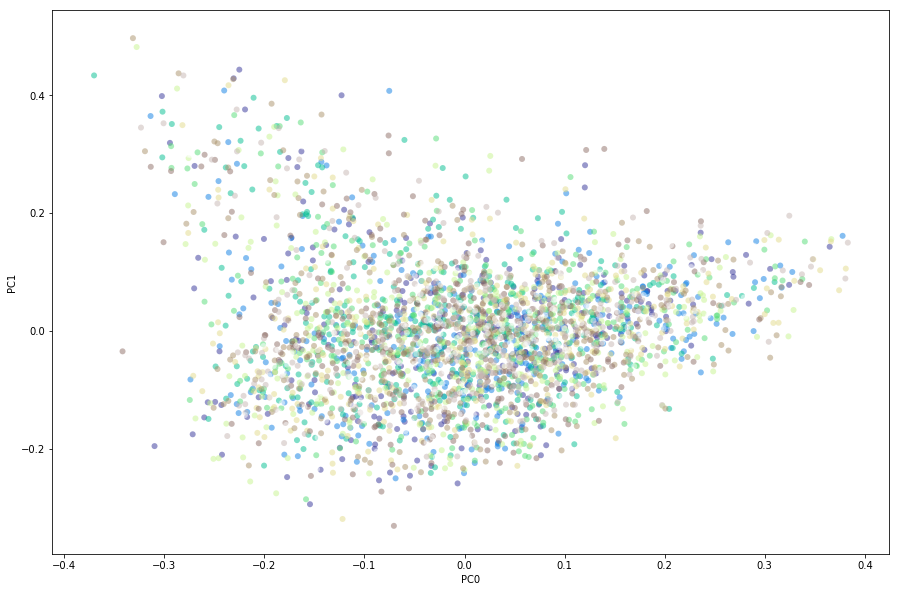

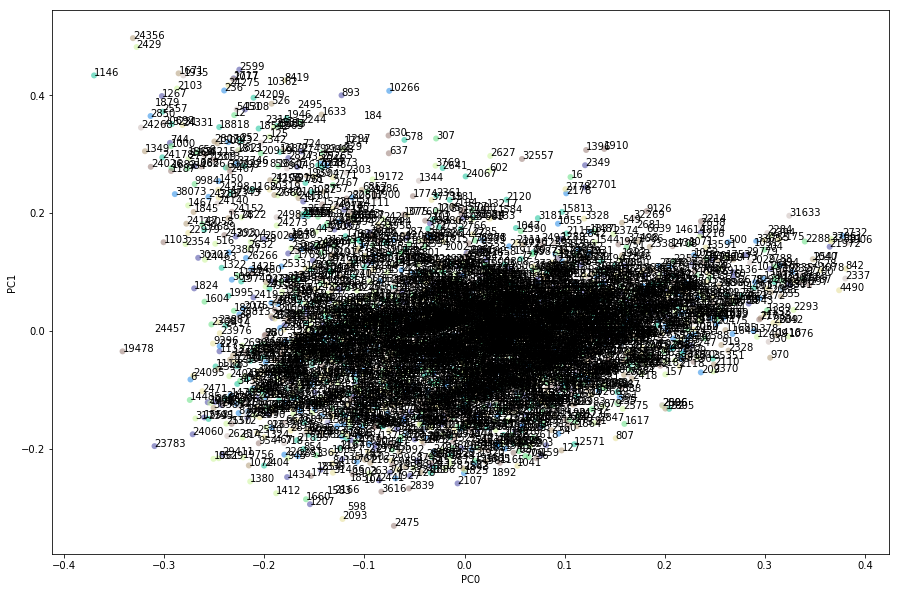

In [7]:
speakers = bags.speaker
speaker_ids = speakers.apply(lambda x: speakers.unique().tolist().index(x)).values

# plot_pca(projected, speaker_ids, 0, 1)
# plot_pca(projected, speaker_ids, 0, 1, annotate='id')

# Event-Based PCA

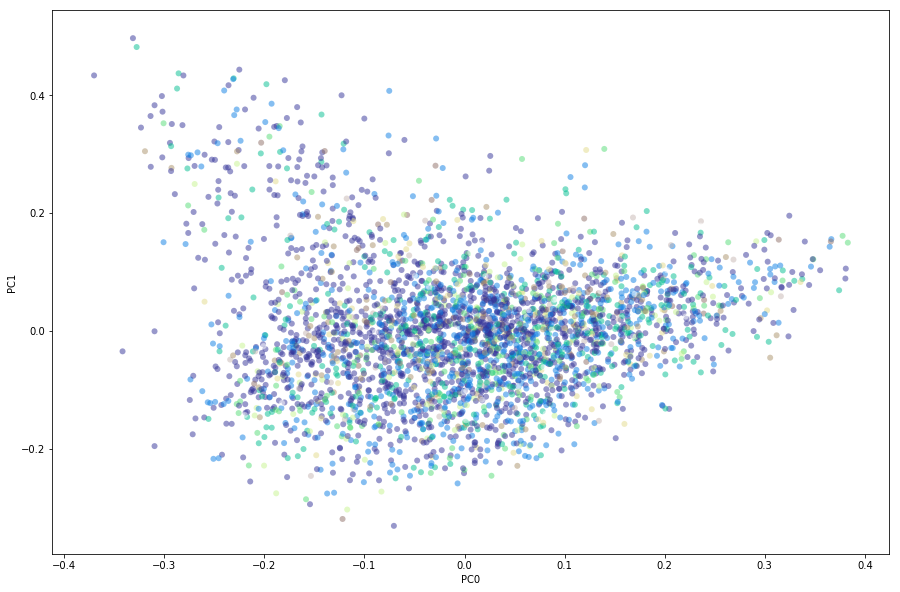

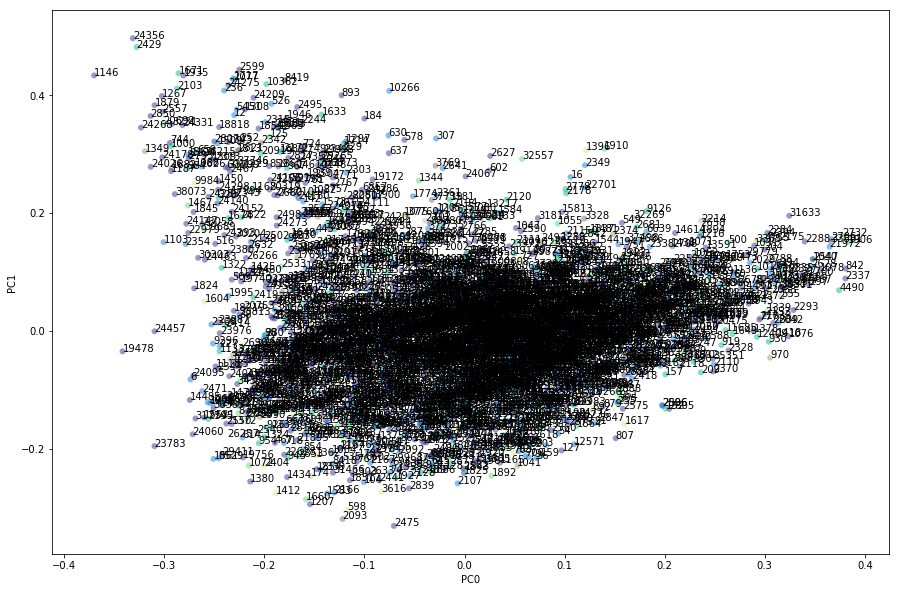

In [8]:
events = bags.event
event_ids = events.apply(lambda x: events.unique().tolist().index(x)).values
         
plot_pca(projected, event_ids, 0, 1)
plot_pca(projected, event_ids, 0, 1, annotate='id')